In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.data.path.append("../local_packages/nltk_data")

In [188]:
# load
tenders = pd.read_csv("../data/uk_tenders_cleaned.csv")


In [189]:
tenders.head()

,Unnamed: 0,id,date,ocid,tender_id,tender_title,tender_status,tender_description,tender_value_amount,tender_value_currency,tender_suitability_sme
0,1,ocds-b5fd17-3bfc9955-92db-47de-b361-ae4caef44f62-2023-02-14T11:57:33Z,2023-02-14T11:57:33Z,ocds-b5fd17-3bfc9955-92db-47de-b361-ae4caef44f62,Cherwell001-DN656200-67143045,**Re Tender** ITT - Investment Atlas for OxCam Pan Regional Partnership,active,To view this opportunity please express an Interest via the the portal\n\nhttps://procontract.due-north.com/Login,130000.00,GBP,True
1,2,ocds-b5fd17-3d24011f-70c7-4508-966f-b50ced346941-2023-01-25T09:57:38Z,2023-01-25T09:57:38Z,ocds-b5fd17-3d24011f-70c7-4508-966f-b50ced346941,CF-1295100D0O000000rwimUAA,For the supply of Pulmicort Turbohaler 400,complete,The Department of Health and Social Care conducted a Direct Award under the Regulation 32(2)(b)(iii) of the Public Contracts Regulations 2015 (as amended) for the supply of Pulmicort Turbohaler 400 mg. The contract period expires on 31 March 2022.,1083000.00,GBP,False
2,3,ocds-b5fd17-8e9e0c53-d5ff-4415-be12-e18643230c22-2023-02-09T09:55:19Z,2023-02-09T09:55:19Z,ocds-b5fd17-8e9e0c53-d5ff-4415-be12-e18643230c22,CF-0033800D8d000003VQwdEAG,Molecular data generation and biobanking river biofilm samples,complete,Molecular data generation and biobanking river biofilm samples,393091.36,GBP,False
3,4,ocds-b5fd17-8a6b7d60-8ee5-4759-9503-7487f4f25922-2023-01-26T09:15:05Z,2023-01-26T09:15:05Z,ocds-b5fd17-8a6b7d60-8ee5-4759-9503-7487f4f25922,BIP754315245,"GB-Cheltenham: TPPL Ubico HCC Lot 2 - 2 x 3.5t Chassis Cab, Low Floor Body (14254)",complete,2 x 3.5 Ton Chassis Cab,101951.90,GBP,False
4,5,ocds-b5fd17-7896932c-e0a4-494b-8987-a1eaaf84383c-2023-01-20T15:51:15Z,2023-01-20T15:51:15Z,ocds-b5fd17-7896932c-e0a4-494b-8987-a1eaaf84383c,NCL001-DN645292-94742015,(NU/1433-43) Self-Enforcing Electronic Voting (SEEV): The Provision of Business Consultancy to Assist Commercialisation of University Research,complete,"The problem that the Self -Enforcing Electronic Voting (SEEV) technology and proposed Spin Out company aims to address is a lack of ""verifiability"" in existing e-voting products in the commercial market. The proposal is to commercialize end-to-end (E2E) verifiable e-voting systems for real-world elections by the creation of a Spin Out company. E2E verifiability refers to the ability of voters to verify if their votes are cast-as-intended, recorded-as-cast, and for any interested party to publicly verify if all ballots are tallied-as-recorded, hence gaining confidence about the integrity of the whole election process.\nThe initial brief of the executive will be to: \nâ¢\tPhase 1 - Write an ambitious business plan in line with ambitions and market opportunities. \nâ¢\tPhase 2 - (a) Complete spin out legals (b) obtain Founder Academic approval for appointment of CEO (c) deliver CCF reporting requirements to Newcastle University\nâ¢\tPhase 3 - Develop a customer pipeline with a number of organisations with the potential to be become key customers \nâ¢\tPhase 4 - Receive Heads of Terms and/or positive intention to invest from a potential investor(s).\n",30000.00,GBP,True


### Clean up

In [190]:
# can we extract anything helpful from tender title?

tenders["title_lower"] = tenders['tender_title'].str.lower()

def remove_punct(ptext):
    # replace any punctuation with nothing "", effectively removing it
    ptext = re.sub(string=ptext,
                   pattern="[{}]".format(string.punctuation), 
                   repl="")
    return ptext

# TODO this doesn't parse out all our "[]" chars


In [191]:
# remove empty titles
tenders["title_lower"].replace('', np.nan, inplace=True)
tenders.dropna(subset=['title_lower'], inplace=True)


In [192]:
# apply removing punctuation function to all elements in the column "abstract"
tenders['title_processed'] = tenders['title_lower'].apply(remove_punct)

### Tokenize

In [193]:
# tokenize
tenders['title_tokens'] = tenders['title_processed'].apply(nltk.word_tokenize)

In [194]:
### Stops

In [195]:
### Stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from list of tokens
def clean_stopwords(tokens):
    # define stopwords
    stop_words = set(stopwords.words('english'))
    # add bespoke for this
    stop_words.add("amp")
    stop_words.add("test")
    # loop through each token and if the word isn't in the set 
    # of stopwords keep it
    return [item for item in tokens if item not in stop_words]
tenders['tokens_no_stops'] = tenders['title_tokens'].apply(clean_stopwords)
tenders.tokens_no_stops.head(35)

0     [tender, itt, investment, atlas, oxcam, pan, regional, partnership]                                                                   
1     [supply, pulmicort, turbohaler, 400]                                                                                                  
2     [molecular, data, generation, biobanking, river, biofilm, samples]                                                                    
3     [gbcheltenham, tppl, ubico, hcc, lot, 2, 2, x, 35t, chassis, cab, low, floor, body, 14254]                                            
4     [nu143343, selfenforcing, electronic, voting, seev, provision, business, consultancy, assist, commercialisation, university, research]
5     [hpft, kingfisher, court, owl, ward, robin, ward, dove, ward]                                                                         
6     [operation, engage, collaboration]                                                                                                    
7     [creati

In [196]:
### Stem

In [197]:
def stemming(ptoken):
    # create stemming object
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in ptoken]  

In [198]:
tenders["title_stemmed"] = tenders["tokens_no_stops"].apply(stemming)

### Lemmatize

In [199]:
# Define the lemmatise() function

def lemmatise(ptokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in ptokens]

In [200]:
tenders["title_lemmatised"] = tenders["tokens_no_stops"].apply(lemmatise)

In [201]:
tenders.title_lemmatised.head(10)

0    [tender, itt, investment, atlas, oxcam, pan, regional, partnership]                                                                   
1    [supply, pulmicort, turbohaler, 400]                                                                                                  
2    [molecular, data, generation, biobanking, river, biofilm, sample]                                                                     
3    [gbcheltenham, tppl, ubico, hcc, lot, 2, 2, x, 35t, chassis, cab, low, floor, body, 14254]                                            
4    [nu143343, selfenforcing, electronic, voting, seev, provision, business, consultancy, assist, commercialisation, university, research]
5    [hpft, kingfisher, court, owl, ward, robin, ward, dove, ward]                                                                         
6    [operation, engage, collaboration]                                                                                                    
7    [creative, brie

### Results

In [202]:
from collections import Counter

In [203]:
tenders.tokens_no_stops = tenders.tokens_no_stops.astype("string")

In [204]:
tenders.title_lemmatised = tenders.title_lemmatised.astype("string")
tenders.title_stemmed = tenders.title_stemmed.astype("string")

In [205]:

results = Counter()
tenders["title_lemmatised"].str.split("'").apply(results.update)
#tenders.title_stemmed.str.split("'").apply(results.update)


0        None
1        None
2        None
3        None
4        None
         ... 
31662    None
31663    None
31664    None
31665    None
31666    None
Name: title_lemmatised, Length: 31667, dtype: object

In [206]:
print("Tokens:", sum(dict(results).values()))


Tokens: 419889


In [207]:
results.most_common()

[(', ', 162447),
 ('[', 31664),
 (']', 31664),
 ('service', 5634),
 ('provision', 2677),
 ('contract', 1996),
 ('support', 1899),
 ('work', 1489),
 ('supply', 1458),
 ('award', 1448),
 ('project', 1429),
 ('system', 1396),
 ('maintenance', 1364),
 ('management', 1227),
 ('school', 1133),
 ('framework', 1035),
 ('programme', 922),
 ('lot', 858),
 ('nh', 799),
 ('training', 752),
 ('health', 741),
 ('2023', 737),
 ('care', 719),
 ('council', 697),
 ('2', 681),
 ('education', 678),
 ('tender', 663),
 ('replacement', 634),
 ('development', 615),
 ('centre', 612),
 ('itt', 609),
 ('equipment', 596),
 ('1', 560),
 ('installation', 548),
 ('refurbishment', 538),
 ('consultancy', 530),
 ('home', 528),
 ('software', 519),
 ('design', 497),
 ('data', 495),
 ('digital', 473),
 ('community', 458),
 ('park', 458),
 ('vehicle', 446),
 ('building', 444),
 ('solution', 441),
 ('repair', 424),
 ('delivery', 422),
 ('primary', 416),
 ('assessment', 416),
 ('survey', 409),
 ('call', 402),
 ('agreement', 

In [208]:
# separate out the tokens and counts into lists
tokens, counts = zip(*results.most_common())

In [209]:
def plotall(px, py):
    
    plt.xticks(fontsize=12, rotation=90)
    plt.ylabel('Frequency')
    plt.xlabel("Tokens")
    plt.bar(px, py)
    plt.show()

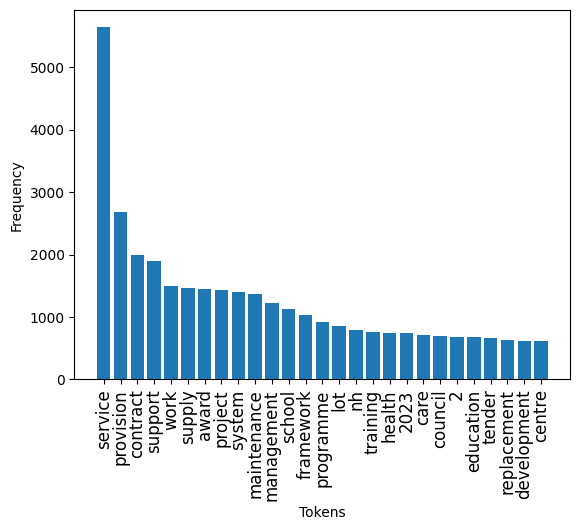

In [210]:
plotall(tokens[3:30], counts[3:30])

## wordcloud

In [211]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

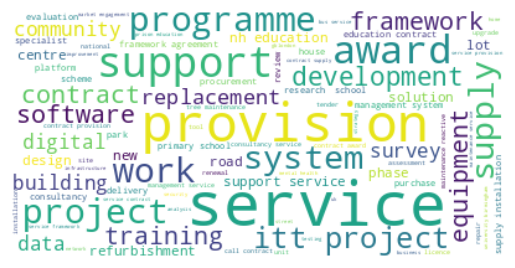

In [212]:
# Join all the token data as string
#tenders['tokens_lem'] = tenders['tokens_no_stops'].apply(return_tostring)
text = " ".join(tenders['title_lemmatised'])
text = text.replace("'", "")
 

# The text string is then passed to the wordcloud function:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [214]:
plt.savefig("../output/uk_tender_titles_world.png")

FileNotFoundError: [Errno 2] No such file or directory: '../ouptut/uk_tender_titles_world.png'

<Figure size 640x480 with 0 Axes>